In [1]:
# For Basic Operations
import pandas as pd
import numpy as np

## Processing movies upto 2016

In [2]:
# Lets Read the Movies Dataset
# if you are still getting a SyntaxError: (unicode error) 'unicodeescape' 
# Just put r before your normal string it converts normal string to raw string:
movie = pd.read_csv(r'C:\Users\Administrator\Movie Recommendation System\Dataset\movie_metadata.csv')


# lets check the shape of the movies dataset
movie.shape

(5043, 28)

In [3]:
# lets check the head of the ratings data
movie.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
# to check the columns of the table
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

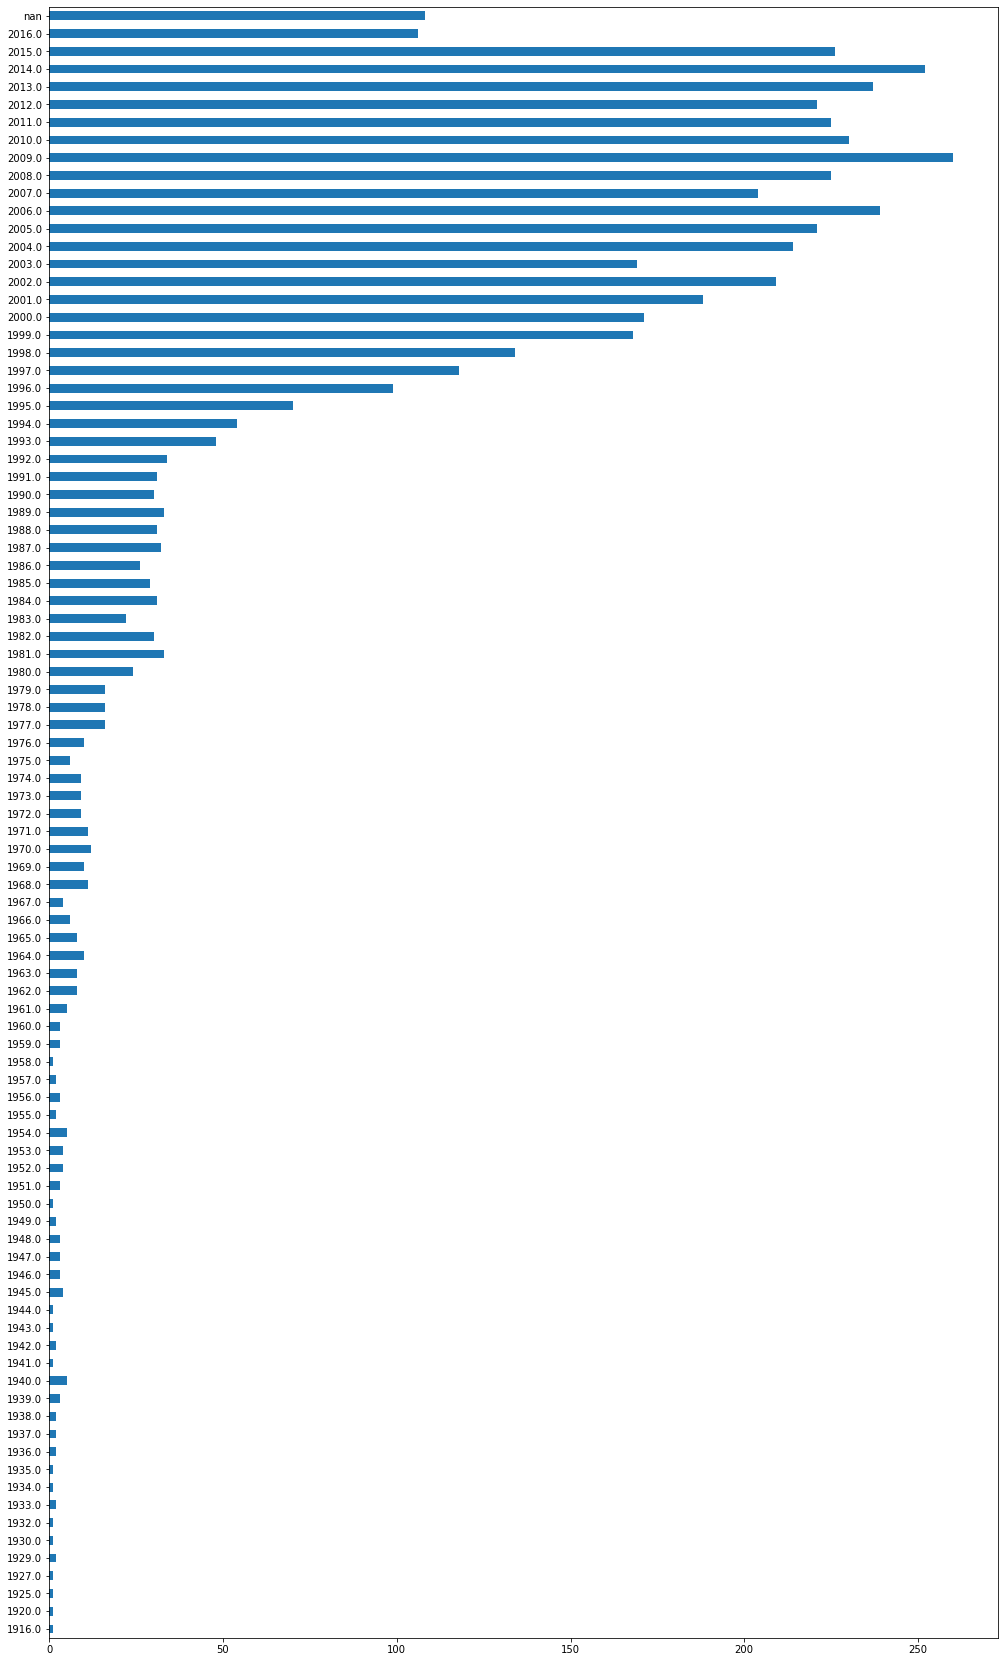

In [5]:
# For Data Visualizations
import matplotlib.pyplot as plt
movie.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(17,30))
plt.show()

In [6]:
# recommendation will be based on these features only
movie = movie.loc[:,['movie_title','genres','director_name','actor_1_name','actor_2_name','actor_3_name']]

movie.head(5)

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN


In [7]:
# replacing NaN values with "Unknown"
movie['director_name'] = movie['director_name'].replace(np.nan, 'Unknown')
movie['actor_1_name'] = movie['actor_1_name'].replace(np.nan, 'Unknown')
movie['actor_2_name'] = movie['actor_2_name'].replace(np.nan, 'Unknown')
movie['actor_3_name'] = movie['actor_3_name'].replace(np.nan, 'Unknown')

# displaying the data
movie

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,Unknown
...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe
5039,The Following,Crime|Drama|Mystery|Thriller,Unknown,Natalie Zea,Valorie Curry,Sam Underwood
5040,A Plague So Pleasant,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler
5041,Shanghai Calling,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe


In [8]:
# some movies have multiple genre separated by |, so replacing it with ' '
movie['genres'] = movie['genres'].str.replace('|', ' ')

# displaying the data
movie

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,Unknown
...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Comedy Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe
5039,The Following,Crime Drama Mystery Thriller,Unknown,Natalie Zea,Valorie Curry,Sam Underwood
5040,A Plague So Pleasant,Drama Horror Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler
5041,Shanghai Calling,Comedy Drama Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe


In [9]:
# renaming some columns
movie = movie.rename(columns={'movie_title':'title'})
movie = movie.rename(columns={'actor_1_name':'actor1_name'})
movie = movie.rename(columns={'actor_2_name':'actor2_name'})
movie = movie.rename(columns={'actor_3_name':'actor3_name'})

# converting movie title to lowercase
movie['title'] = movie['title'].str.lower()

In [10]:
# null terminating char at the end
movie['title'][1]

"pirates of the caribbean: at world's end\xa0"

In [11]:
# removing the null terminating char at the end
movie['title'] = movie['title'].apply(lambda x : x[:-1])

# again checking
movie['title'][1]

"pirates of the caribbean: at world's end"

In [12]:
# a column with combined information
movie['comb'] = movie['director_name'] + ' ' + movie['actor1_name'] + ' ' + movie['actor2_name'] + ' ' + movie['actor3_name'] + ' ' + movie['genres']

# displaying the data
movie

,title,genres,director_name,actor1_name,actor2_name,actor3_name,comb
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,James Cameron CCH Pounder Joel David Moore Wes...
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski Johnny Depp Orlando Bloom Jack ...
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes Christoph Waltz Rory Kinnear Stepha...
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan Tom Hardy Christian Bale Jos...
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,Unknown,Doug Walker Doug Walker Rob Walker Unknown Doc...
...,...,...,...,...,...,...,...
5038,signed sealed delivered,Comedy Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Scott Smith Eric Mabius Daphne Zuniga Crystal ...
5039,the following,Crime Drama Mystery Thriller,Unknown,Natalie Zea,Valorie Curry,Sam Underwood,Unknown Natalie Zea Valorie Curry Sam Underwoo...
5040,a plague so pleasant,Drama Horror Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Benjamin Roberds Eva Boehnke Maxwell Moody Dav...
5041,shanghai calling,Comedy Drama Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Daniel Hsia Alan Ruck Daniel Henney Eliza Coup...


## Processing movies upto year 2017

In [13]:
movies = pd.read_csv(r'C:\Users\Administrator\Movie Recommendation System\Dataset\movies_metadata.csv')

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

In [15]:
movies['year'] = movies['release_date'].dt.year

In [16]:
#Let's check the first and last release

print("First release year: ",movies['year'].min())
print("Last release year: ",movies['year'].max())

First release year:  1874.0
Last release year:  2020.0


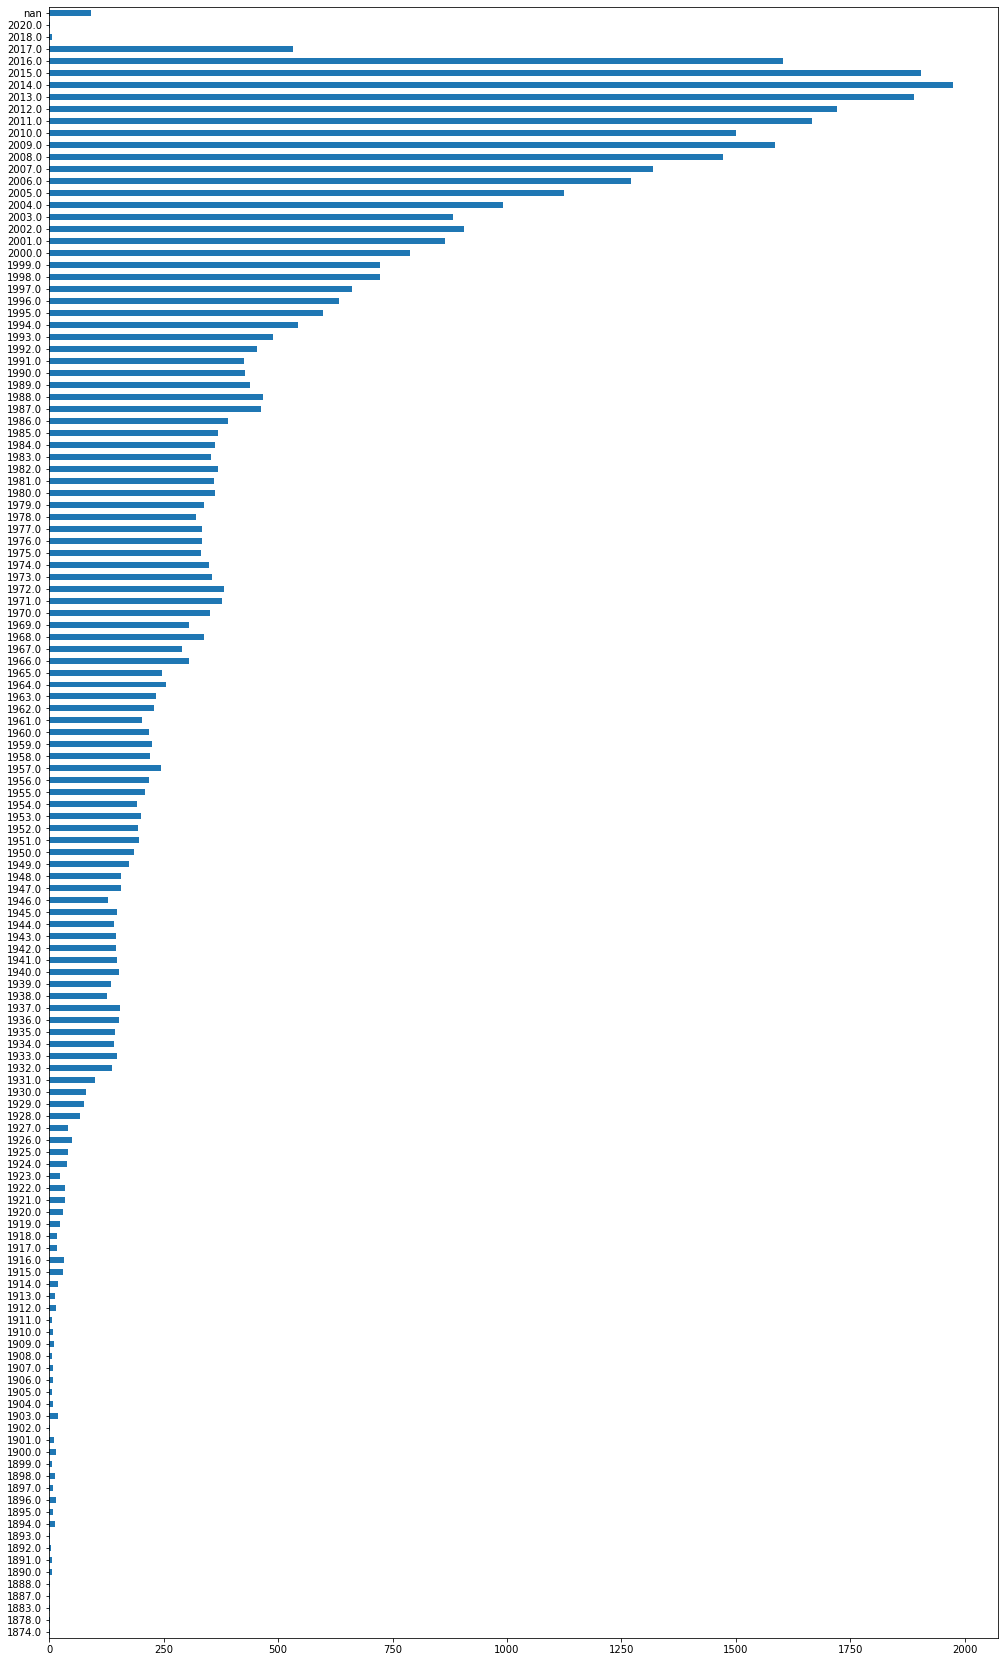

In [17]:
# For Data Visualizations
import matplotlib.pyplot as plt
movies.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(17,30))
plt.show()

In [18]:
# this data mainly consists the information of the movie, we also need credits data
credits_data = pd.read_csv(r'C:\Users\Administrator\Movie Recommendation System\Dataset\credits.csv')

In [19]:
credits_data

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [20]:
#loc is label-based, which means that you have to specify rows and columns based on their row and column labels.
# recommendation will be based on these features only
movies = movies.loc[movies.year == 2017,['id','title','genres','year']]

In [21]:
movies

,id,title,genres,year
26560,166426,Pirates of the Caribbean: Dead Men Tell No Tales,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2017.0
26561,141052,Justice League,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2017.0
26565,284053,Thor: Ragnarok,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2017.0
26566,283995,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2017.0
30536,245842,The King's Daughter,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2017.0
...,...,...,...,...
45398,468707,Thick Lashes of Lauri Mäntyvaara,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2017.0
45417,461297,Cop and a Half: New Recruit,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",2017.0
45437,455661,In a Heartbeat,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2017.0
45453,404604,Mom,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2017.0


In [22]:
# DataFrame.astype() method is used to cast a pandas object to a specified dtype.
movies['id'] = movies['id'].astype(int)

In [23]:
# merge the movie data and credits data on the basis of same id
movie_data = pd.merge(movies, credits_data, on='id')

In [24]:
# display.max_colwidth sets the maximum width of columns
pd.set_option('display.max_colwidth', 70)
# display movie data
movie_data

,id,title,genres,year,cast,crew
0,166426,Pirates of the Caribbean: Dead Men Tell No Tales,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'...",2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': ...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Producti..."
1,141052,Justice League,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...",2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': ...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Producti..."
2,284053,Thor: Ragnarok,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...",2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing'..."
3,283995,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...",2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', ..."
4,245842,The King's Daughter,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id...",2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431d...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directin..."
...,...,...,...,...,...,...
526,468707,Thick Lashes of Lauri Mäntyvaara,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a3685...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directin..."
527,461297,Cop and a Half: New Recruit,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id':...",2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '59...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing'..."
528,455661,In a Heartbeat,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'},...",2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', ..."
529,404604,Mom,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': ...",2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '57780...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', ..."


In [25]:
# The ast.literal_eval function evaluates an expression node or a string consisting of a Python literal or container display.
import ast
movie_data['genres'] = movie_data['genres'].map(lambda x: ast.literal_eval(x))
movie_data['cast'] = movie_data['cast'].map(lambda x: ast.literal_eval(x))
movie_data['crew'] = movie_data['crew'].map(lambda x: ast.literal_eval(x))

In [26]:
movie_data['genres']

0      [{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'...
1      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...
2      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...
3      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...
4      [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id...
                                       ...                                  
526         [{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
527    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id':...
528    [{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'},...
529    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': ...
530                                                                       []
Name: genres, Length: 531, dtype: object

In [27]:
# function to get genre list
def genresList(x):
    genre = []
    s = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            genre.append(scifi)
        else:
            genre.append(i.get('name'))
    if genre == []:
        return np.NaN
    else:
        return (s.join(genre))

In [28]:
movie_data['genres'] = movie_data['genres'].map(lambda x: genresList(x))

# printing genres_list
movie_data['genres']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres, Length: 531, dtype: object

In [29]:
# function to get directors name
def get_directors_name(x):
    d = []
    s = " "
    for i in x:
        if i.get('job') == 'Director':
            d.append(i.get('name'))
    if d == []:
        return np.NaN
    else:
        return (s.join(d))

In [30]:
# creating a column 'director_name' in movie_data
movie_data['director_name'] = movie_data['crew'].map(lambda x: get_directors_name(x))

#printing the column
movie_data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [31]:
# function to get actor1 name
def get_actor1_name(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])
        # casts[0] index = 0 because 1st value contains actor1 name 

In [32]:
# creating a column 'actor1_name' in movie_data
movie_data['actor1_name'] = movie_data['cast'].map(lambda x: get_actor1_name(x))

#printing the column
movie_data['actor1_name']

0               Johnny Depp
1               Ben Affleck
2           Chris Hemsworth
3               Chris Pratt
4            Pierce Brosnan
               ...         
526          Inka Haapamäki
527    Lou Diamond Phillips
528                     NaN
529          Sridevi Kapoor
530                     NaN
Name: actor1_name, Length: 531, dtype: object

In [33]:
# function to get actor2 name
def get_actor2_name(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts) <= 1:
        return np.NaN
    else:
        return (casts[1])
        # casts[0] index = 1 because 2nd value contains actor2 name

In [34]:
# creating a column 'actor2_name' in movie_data
movie_data['actor2_name'] = movie_data['cast'].map(lambda x: get_actor2_name(x))

#printing the column
movie_data['actor2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor2_name, Length: 531, dtype: object

In [35]:
# function to get actor3 name
def get_actor3_name(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts) <= 2:
        return np.NaN
    else:
        return (casts[2])
        # casts[0] index = 2 because 3rd value contains actor3 name

In [36]:
# creating a column 'actor3_name' in movie_data
movie_data['actor3_name'] = movie_data['cast'].map(lambda x: get_actor3_name(x))

#printing the column
movie_data['actor3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor3_name, Length: 531, dtype: object

In [37]:
movies = movie_data.loc[:,['title','genres','director_name','actor1_name','actor2_name','actor3_name']]

# printing movies
movies

,title,genres,director_name,actor1_name,actor2_name,actor3_name
0,Pirates of the Caribbean: Dead Men Tell No Tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush
1,Justice League,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot
2,Thor: Ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett
3,Guardians of the Galaxy Vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista
4,The King's Daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker
...,...,...,...,...,...,...
526,Thick Lashes of Lauri Mäntyvaara,Romance Comedy,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala
527,Cop and a Half: New Recruit,Crime Comedy Action Family,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden
528,In a Heartbeat,Family Animation Romance Comedy,Beth David Esteban Bravo,NaN,NaN,NaN
529,Mom,Crime Drama Thriller,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna


In [38]:
# isna() function is used to detect missing values
movies.isna().sum()

title             0
genres            7
director_name     4
actor1_name      22
actor2_name      55
actor3_name      70
dtype: int64

In [39]:
# dropna() method removes the rows that contains NULL values
movies = movies.dropna()

# again checking
movies.isna().sum()

title            0
genres           0
director_name    0
actor1_name      0
actor2_name      0
actor3_name      0
dtype: int64

In [40]:
# converting movie title in lowercase
movies['title'] = movies['title'].str.lower()

<ipython-input-40-603916425dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['title'] = movies['title'].str.lower()


In [41]:
# a column with combined information
movies['comb'] = movies['director_name'] + ' ' + movies['actor1_name'] + ' ' + movies['actor2_name'] + ' ' + movies['actor3_name'] + ' ' + movies['genres']

<ipython-input-41-7a1f88795645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['comb'] = movies['director_name'] + ' ' + movies['actor1_name'] + ' ' + movies['actor2_name'] + ' ' + movies['actor3_name'] + ' ' + movies['genres']


In [42]:
# printing the movies data
movies

,title,genres,director_name,actor1_name,actor2_name,actor3_name,comb
0,pirates of the caribbean: dead men tell no tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg Johnny Depp Javier Bardem Geoffrey ...
1,justice league,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder Ben Affleck Henry Cavill Gal Gadot Action Adventure Fa...
2,thor: ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi Chris Hemsworth Tom Hiddleston Cate Blanchett Action...
3,guardians of the galaxy vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn Chris Pratt Zoe Saldana Dave Bautista Action Adventure ...
4,the king's daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara Pierce Brosnan William Hurt Benjamin Walker Fantasy ...
...,...,...,...,...,...,...,...
524,the incredible jessica james,Romance Comedy,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Jim Strouse Jessica Williams Chris O'Dowd Keith Stanfield Romance ...
525,can't buy my love,Romance,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Farhad Mann Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly...
526,thick lashes of lauri mäntyvaara,Romance Comedy,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Hannaleena Hauru Inka Haapamäki Rosa Honkonen Tiitus Rantala Roman...
527,cop and a half: new recruit,Crime Comedy Action Family,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Jonathan A. Rosenbaum Lou Diamond Phillips Wallace Shawn Gina Hold...


## Combining the data

In [43]:
movies = movies.append(movie, ignore_index = True)

# displaying the data
movies

,title,genres,director_name,actor1_name,actor2_name,actor3_name,comb
0,pirates of the caribbean: dead men tell no tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg Johnny Depp Javier Bardem Geoffrey ...
1,justice league,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder Ben Affleck Henry Cavill Gal Gadot Action Adventure Fa...
2,thor: ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi Chris Hemsworth Tom Hiddleston Cate Blanchett Action...
3,guardians of the galaxy vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn Chris Pratt Zoe Saldana Dave Bautista Action Adventure ...
4,the king's daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara Pierce Brosnan William Hurt Benjamin Walker Fantasy ...
...,...,...,...,...,...,...,...
5496,signed sealed delivered,Comedy Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Scott Smith Eric Mabius Daphne Zuniga Crystal Lowe Comedy Drama
5497,the following,Crime Drama Mystery Thriller,Unknown,Natalie Zea,Valorie Curry,Sam Underwood,Unknown Natalie Zea Valorie Curry Sam Underwood Crime Drama Myster...
5498,a plague so pleasant,Drama Horror Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Benjamin Roberds Eva Boehnke Maxwell Moody David Chandler Drama Ho...
5499,shanghai calling,Comedy Drama Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Daniel Hsia Alan Ruck Daniel Henney Eliza Coupe Comedy Drama Romance


In [44]:
# The to_csv() function is used to write object to a comma-separated values (csv) file.
movies.to_csv('movies_till2017.csv', index = False)